#Análisis de Datos

### Importación de datos



In [30]:
import matplotlib.pyplot as plt

In [94]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


# Análisis Exploratorio

##1. Análisis de facturación



In [110]:
facturacion = {
    "Tienda 1": tienda["Precio"].sum(),
    "Tienda 2": tienda2["Precio"].sum(),
    "Tienda 3": tienda3["Precio"].sum(),
    "Tienda 4": tienda4["Precio"].sum()
    }

In [111]:
facturacion_df = pd.DataFrame(
    list(facturacion.items()),
    columns = ["Tienda", "Facturación"]
)

In [112]:
facturacion_df

,Tienda,Facturación
0,Tienda 1,1.150880e+09
1,Tienda 2,1.116344e+09
2,Tienda 3,1.098020e+09
3,Tienda 4,1.038376e+09


##2. Ventas por categoría

In [35]:
ventas_categoria_t1 = (
    tienda
    .groupby("Categoría del Producto")
    .size()
    .reset_index(name="Cantidad de ventas")
    .sort_values(by="Cantidad de ventas", ascending=False)
)
ventas_categoria_t1

,Categoría del Producto,Cantidad de ventas
7,Muebles,465
3,Electrónicos,448
5,Juguetes,324
2,Electrodomésticos,312
1,Deportes y diversión,284
4,Instrumentos musicales,182
6,Libros,173
0,Artículos para el hogar,171


In [36]:
ventas_categoria_t2 = (
    tienda2
    .groupby("Categoría del Producto")
    .size()
    .reset_index(name="Cantidad de ventas")
    .sort_values(by="Cantidad de ventas", ascending=False)
)
ventas_categoria_t2

,Categoría del Producto,Cantidad de ventas
7,Muebles,442
3,Electrónicos,422
5,Juguetes,313
2,Electrodomésticos,305
1,Deportes y diversión,275
4,Instrumentos musicales,224
6,Libros,197
0,Artículos para el hogar,181


In [90]:
ventas_categoria_t3 = (
    tienda3
    .groupby("Categoría del Producto")
    .size()
    .reset_index(name="Cantidad de ventas")
    .sort_values(by="Cantidad de ventas", ascending=False)
)
ventas_categoria_t3.head()

,Categoría del Producto,Cantidad de ventas
7,Muebles,499
3,Electrónicos,451
5,Juguetes,315
2,Electrodomésticos,278
1,Deportes y diversión,277


In [91]:
ventas_categoria_t4 = (
    tienda4
    .groupby("Categoría del Producto")
    .size()
    .reset_index(name="Cantidad de ventas")
    .sort_values(by="Cantidad de ventas", ascending=False)
)
ventas_categoria_t4.head()

,Categoría del Producto,Cantidad de ventas
7,Muebles,480
3,Electrónicos,451
5,Juguetes,338
1,Deportes y diversión,277
2,Electrodomésticos,254



Unificación de Ventas por Categoría


In [39]:
ventas_categoria_t1["Tienda"] = "Tienda 1"
ventas_categoria_t2["Tienda"] = "Tienda 2"
ventas_categoria_t3["Tienda"] = "Tienda 3"
ventas_categoria_t4["Tienda"] = "Tienda 4"

In [89]:
ventas_categorias_total = pd.concat(
    [
        ventas_categoria_t1,
        ventas_categoria_t2,
        ventas_categoria_t3,
        ventas_categoria_t4
    ],
    ignore_index=True
)

ventas_categorias_total.head()

,Categoría del Producto,Cantidad de ventas,Tienda
0,Muebles,465,Tienda 1
1,Electrónicos,448,Tienda 1
2,Juguetes,324,Tienda 1
3,Electrodomésticos,312,Tienda 1
4,Deportes y diversión,284,Tienda 1


#### Ventas por categoría comparativa tiendas


In [41]:
tabla_comparativa_categoria = ventas_categorias_total.pivot_table(
    index="Categoría del Producto",
    columns="Tienda",
    values="Cantidad de ventas",
    fill_value=0
)

tabla_comparativa_categoria

Tienda,Tienda 1,Tienda 2,Tienda 3,Tienda 4
Categoría del Producto,,,,
Artículos para el hogar,171.0,181.0,177.0,201.0
Deportes y diversión,284.0,275.0,277.0,277.0
Electrodomésticos,312.0,305.0,278.0,254.0
Electrónicos,448.0,422.0,451.0,451.0
Instrumentos musicales,182.0,224.0,177.0,170.0
Juguetes,324.0,313.0,315.0,338.0
Libros,173.0,197.0,185.0,187.0
Muebles,465.0,442.0,499.0,480.0


In [42]:
tabla_comparativa_categoria = tabla_comparativa_categoria.astype(int)
tabla_comparativa_categoria

Tienda,Tienda 1,Tienda 2,Tienda 3,Tienda 4
Categoría del Producto,,,,
Artículos para el hogar,171,181,177,201
Deportes y diversión,284,275,277,277
Electrodomésticos,312,305,278,254
Electrónicos,448,422,451,451
Instrumentos musicales,182,224,177,170
Juguetes,324,313,315,338
Libros,173,197,185,187
Muebles,465,442,499,480


## 3. Calificación promedio de la tienda


In [43]:
calificacion_promedio = {
    "Tienda 1": tienda["Calificación"].mean(),
    "Tienda 2": tienda2["Calificación"].mean(),
    "Tienda 3": tienda3["Calificación"].mean(),
    "Tienda 4": tienda4["Calificación"].mean()
}

calificacion_promedio_df = pd.DataFrame(
    list(calificacion_promedio.items()),
    columns=["Tienda", "Calificación promedio"]
)

calificacion_promedio_df


,Tienda,Calificación promedio
0,Tienda 1,3.976685
1,Tienda 2,4.037304
2,Tienda 3,4.048326
3,Tienda 4,3.995759


## 4. Productos más y menos vendidos

In [83]:
ventas_producto_t1 = (
    tienda
    .groupby("Producto")
    .size()
    .reset_index(name="Cantidad de ventas")
    .sort_values(by="Cantidad de ventas", ascending=False)
)

ventas_producto_t1.head()

,Producto,Cantidad de ventas
1,Armario,60
48,TV LED UHD 4K,60
33,Microondas,60
40,Secadora de ropa,58
32,Mesa de noche,56


In [45]:
producto_mas_vendido_t1 = ventas_producto_t1.head(1)
producto_mas_vendido_t1

,Producto,Cantidad de ventas
1,Armario,60


In [46]:
producto_menos_vendido_t1 = ventas_producto_t1.tail(1)
producto_menos_vendido_t1

,Producto,Cantidad de ventas
4,Auriculares con micrófono,33


In [84]:
ventas_producto_t2 = (
    tienda2
    .groupby("Producto")
    .size()
    .reset_index(name="Cantidad de ventas")
    .sort_values(by="Cantidad de ventas", ascending=False)
)
ventas_producto_t2.head()

,Producto,Cantidad de ventas
24,Iniciando en programación,65
33,Microondas,62
7,Batería,61
38,Pandereta,58
21,Guitarra acústica,58


In [48]:
producto_mas_vendido_t2 = ventas_producto_t2.head(1)
producto_mas_vendido_t2

,Producto,Cantidad de ventas
24,Iniciando en programación,65


In [49]:
producto_menos_vendido_t2 = ventas_producto_t2.tail(1)
producto_menos_vendido_t2

,Producto,Cantidad de ventas
26,Juego de mesa,32


In [85]:
ventas_producto_t3 = (
    tienda3
    .groupby("Producto")
    .size()
    .reset_index(name="Cantidad de ventas")
    .sort_values(by="Cantidad de ventas", ascending=False)
)
ventas_producto_t3.head()

,Producto,Cantidad de ventas
27,Kit de bancas,57
31,Mesa de comedor,56
11,Cama king,56
41,Set de ollas,55
32,Mesa de noche,55


In [51]:
producto_mas_vendido_t3 = ventas_producto_t3.head(1)
producto_mas_vendido_t3

,Producto,Cantidad de ventas
27,Kit de bancas,57


In [52]:
producto_menos_vendido_t3 = ventas_producto_t3.tail(1)
producto_menos_vendido_t3

,Producto,Cantidad de ventas
9,Bloques de construcción,35


In [82]:
ventas_producto_t4 = (
    tienda4
    .groupby("Producto")
    .size()
    .reset_index(name="Cantidad de ventas")
    .sort_values(by="Cantidad de ventas", ascending=False)
)
ventas_producto_t4.head()

,Producto,Cantidad de ventas
10,Cama box,62
15,Cubertería,59
11,Cama king,56
18,Dashboards con Power BI,56
12,Carrito de control remoto,55


In [54]:
producto_mas_vendido_t4 = ventas_producto_t4.head(1)
producto_mas_vendido_t4

,Producto,Cantidad de ventas
10,Cama box,62


In [55]:
producto_menos_vendido_t4 = ventas_producto_t4.tail(1)
producto_menos_vendido_t4

,Producto,Cantidad de ventas
22,Guitarra eléctrica,33


In [104]:
#Crear una lista de df
dfs = [ventas_producto_t1, ventas_producto_t2, ventas_producto_t3, ventas_producto_t4]
nombres_tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

# Concatenación y organización de los datos de los df
df_final = pd.concat(dfs, keys=nombres_tiendas).reset_index(level=0).rename(columns={'level_0': 'Tienda'})
df_final = df_final.reset_index(drop=True)
df_final.head()

,Tienda,Producto,Cantidad de ventas
0,Tienda 1,Armario,60
1,Tienda 1,TV LED UHD 4K,60
2,Tienda 1,Microondas,60
3,Tienda 1,Secadora de ropa,58
4,Tienda 1,Mesa de noche,56


In [75]:
#Ventas totales x tienda
df_final.groupby('Tienda')['Cantidad de ventas'].sum()

,Cantidad de ventas
Tienda,
Tienda 1,2359
Tienda 2,2359
Tienda 3,2359
Tienda 4,2358


In [78]:
df_final.groupby('Tienda')['Cantidad de ventas'].idxmax()

,Cantidad de ventas
Tienda,
Tienda 1,0
Tienda 2,51
Tienda 3,102
Tienda 4,153


In [81]:
# Agrupar por tienda y encontrar el índice del máximo y mínimo en 'Cantidad de ventas'
idx_max = df_final.groupby('Tienda')['Cantidad de ventas'].idxmax()
idx_min = df_final.groupby('Tienda')['Cantidad de ventas'].idxmin()

# Localizar los pindices max y mpinimos encontrados en el paso anterior
mas_vendidos = df_final.loc[idx_max]
menos_vendidos = df_final.loc[idx_min]

In [71]:
# Concatenar los df y ordenarlos por tienda
resultados = pd.concat([mas_vendidos, menos_vendidos]).sort_values('Tienda')
resultados

,Tienda,Producto,Cantidad de ventas
0,Tienda 1,Armario,60
49,Tienda 1,Celular ABXY,33
51,Tienda 2,Iniciando en programación,65
101,Tienda 2,Juego de mesa,32
102,Tienda 3,Kit de bancas,57
152,Tienda 3,Bloques de construcción,35
153,Tienda 4,Cama box,62
203,Tienda 4,Guitarra eléctrica,33


## 5. Envío promedio por tienda

In [113]:
envio_promedio = {
    "Tienda 1": tienda["Costo de envío"].mean(),
    "Tienda 2": tienda2["Costo de envío"].mean(),
    "Tienda 3": tienda3["Costo de envío"].mean(),
    "Tienda 4": tienda4["Costo de envío"].mean()
}

envio_promedio_df = pd.DataFrame(
    list(envio_promedio.items()),
    columns=["Tienda", "Envío promedio"]
)

envio_promedio_df

,Tienda,Envío promedio
0,Tienda 1,26018.609580
1,Tienda 2,25216.235693
2,Tienda 3,24805.680373
3,Tienda 4,23459.457167


#Análisis del Negocio

## 1. ¿Qué tienda genera menores ingresos?

In [151]:
facturacion_df

,Tienda,Facturación
0,Tienda 1,1.150880e+09
1,Tienda 2,1.116344e+09
2,Tienda 3,1.098020e+09
3,Tienda 4,1.038376e+09


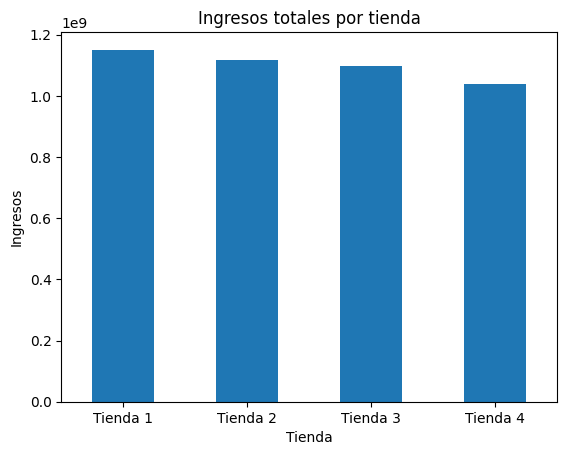

In [135]:
ingresos_por_tienda = facturacion_df.set_index('Tienda')['Facturación']

plt.figure()
ingresos_por_tienda.plot(kind='bar')
plt.title('Ingresos totales por tienda')
plt.ylabel('Ingresos')
plt.xlabel('Tienda')
plt.xticks(rotation=0)
plt.show()

## 2. ¿Cuál es el tiquet promedio por tienda?



In [114]:
facturacion_df

,Tienda,Facturación
0,Tienda 1,1.150880e+09
1,Tienda 2,1.116344e+09
2,Tienda 3,1.098020e+09
3,Tienda 4,1.038376e+09


In [113]:
total_ventas = df_final.groupby("Tienda")["Cantidad de ventas"].sum().reset_index()
total_ventas

,Tienda,Cantidad de ventas
0,Tienda 1,2359
1,Tienda 2,2359
2,Tienda 3,2359
3,Tienda 4,2358


In [117]:
ticket_promedio = facturacion_df.merge(total_ventas, on="Tienda")
ticket_promedio["Ticket promedio"]= ticket_promedio["Facturación"] / ticket_promedio["Cantidad de ventas"]
ticket_promedio

,Tienda,Facturación,Cantidad de ventas,Ticket promedio
0,Tienda 1,1.150880e+09,2359,487867.910131
1,Tienda 2,1.116344e+09,2359,473227.426876
2,Tienda 3,1.098020e+09,2359,465459.771089
3,Tienda 4,1.038376e+09,2358,440362.892282


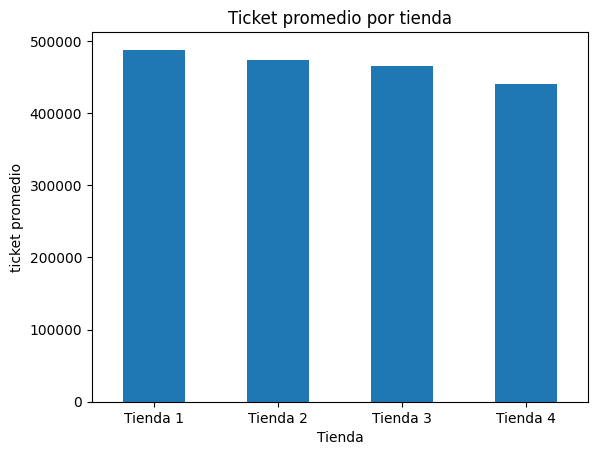

In [125]:
plt.figure()
ticket_promedio['Ticket promedio'].plot(kind='bar')
plt.title('Ticket promedio por tienda')
plt.ylabel('ticket promedio')
plt.xlabel('Tienda')
plt.xticks(ticket_promedio.index,ticket_promedio['Tienda'],rotation=0)
plt.show()

##3. ¿Cuál tienda tiene la menor calificación?

In [130]:
calificacion_promedio_df

,Tienda,Calificación promedio
0,Tienda 1,3.976685
1,Tienda 2,4.037304
2,Tienda 3,4.048326
3,Tienda 4,3.995759


In [140]:
facturacion_calificacion = facturacion_df.merge(calificacion_promedio_df, on="Tienda")
facturacion_calificacion

,Tienda,Facturación,Calificación promedio
0,Tienda 1,1.150880e+09,3.976685
1,Tienda 2,1.116344e+09,4.037304
2,Tienda 3,1.098020e+09,4.048326
3,Tienda 4,1.038376e+09,3.995759


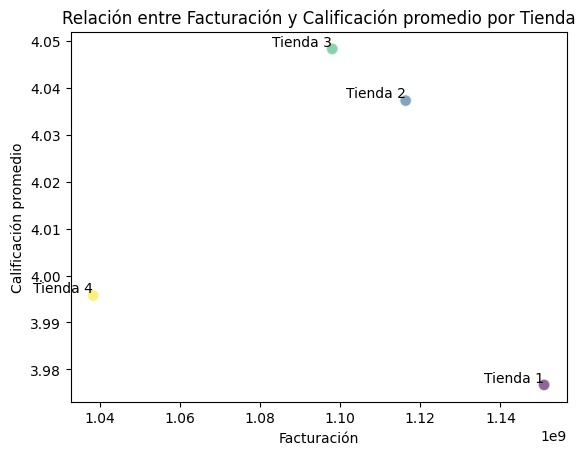

In [148]:
plt.scatter(
    facturacion_calificacion['Facturación'], #Variable Eje X
    facturacion_calificacion["Calificación promedio"], #Variable eje Y
    alpha=0.6,
    c=facturacion_calificacion.index, # Use numerical index for coloring
    cmap='viridis',
    edgecolors='white',
    s=70
)

# Add labels for each point for better readability
for i, row in facturacion_calificacion.iterrows():
    plt.text(row['Facturación'], row["Calificación promedio"], row['Tienda'], ha='right', va='bottom')

plt.xlabel('Facturación')
plt.ylabel('Calificación promedio')
plt.title('Relación entre Facturación y Calificación promedio por Tienda')
plt.show()

##4. ¿Cuál es la tienda que representa mayor gastos de envío para los clientes?

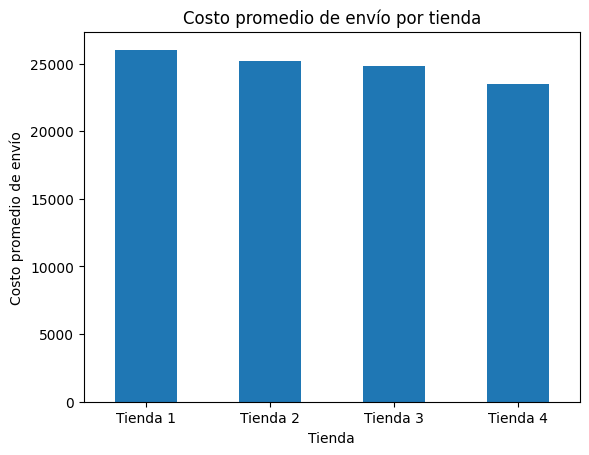

In [118]:
envio_promedio_plot = envio_promedio_df.set_index('Tienda')['Envío promedio']

plt.figure()
envio_promedio_plot.plot(kind='bar')
plt.title('Costo promedio de envío por tienda')
plt.xlabel('Tienda')
plt.ylabel('Costo promedio de envío')
plt.xticks(rotation=0)
plt.show()

#Hallazgos y Recomendaciones

A partir del análisis realizado con información de las cuatro tiendas de Alura Store, se identifica que a nivel general, las tiendas presentan un comportamiento homogeneo. Sin embargo, algunas diferencias mínimas evidenciadas sugieren que la Tienda 4 representa la primera opción de venta del señor Juan, justificado en los siguientes hallazgos:

 - La Tienda 4 presenta la menor facturación total y el ticket promedio más bajo, pese a registrar un volumen de ventas prácticamente igual al de las demás tiendas, lo que indica una menor capacidad de generación de valor por transacción.

 - En términos de satisfacción del cliente, las calificaciones promedio se mantienen cercanas a 4 sobre 5 en todas las tiendas sin diferencias significativas; pese a esto la Tienda 4 se encuentra ligeramente menor ranckeada en cuanto a calificaciones. Sin embargo, al tener una diferencia mpinima, esto no representa una ventaja competitiva.

Con base en estos hallazgos, se recomienda al Sr. Juan considerar inicialmente estrategias de fortalecimiento para la Tienda 4 especialmente orientadas a incrementar el ticket promedio y el valor percibido por compra, por ejemplo: promociones, combos de productos o revisión de costos de envío, dado que las brechas frente a las demás tiendas no son amplias. En caso de que dichas acciones no generen mejoras sostenidas, la venta de la Tienda 4 es la alternativa más conveniente, al tratarse de la tienda con menor eficiencia económica relativa dentro de la cadena y sin ventajas diferenciales claras frente a las demás.